In [6]:
import pandas as pd

data = pd.read_excel('DataSampah.xlsx')

df = pd.DataFrame({
    'Kode Provinsi': data['kode_provinsi'],
    'Nama Provinsi': data['nama_provinsi'],  
    'Kode Kabupaten Kota': data['kode_kabupaten_kota'],
    'Nama Kabupaten Kota' : data['nama_kabupaten_kota'],
    'Jumlah Produksi Sampah' : data['jumlah_produksi_sampah'],
    'Satuan (Ton)' : data['satuan'],
    'Tahun' : data['tahun']
})
df.index = df.index + 1
df

,Kode Provinsi,Nama Provinsi,Kode Kabupaten Kota,Nama Kabupaten Kota,Jumlah Produksi Sampah,Satuan (Ton),Tahun
1,32,JAWA BARAT,3201,KABUPATEN BOGOR,1511.15,TON PER HARI,2015
2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,419.01,TON PER HARI,2015
3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,981.41,TON PER HARI,2015
4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,1895.94,TON PER HARI,2015
5,32,JAWA BARAT,3205,KABUPATEN GARUT,464.74,TON PER HARI,2015
...,...,...,...,...,...,...,...
239,32,JAWA BARAT,3275,KOTA BEKASI,NaN,TON PER HARI,2023
240,32,JAWA BARAT,3276,KOTA DEPOK,NaN,TON PER HARI,2023
241,32,JAWA BARAT,3277,KOTA CIMAHI,NaN,TON PER HARI,2023
242,32,JAWA BARAT,3278,KOTA TASIKMALAYA,NaN,TON PER HARI,2023


In [7]:
df

,Kode Provinsi,Nama Provinsi,Kode Kabupaten Kota,Nama Kabupaten Kota,Jumlah Produksi Sampah,Satuan (Ton),Tahun
1,32,JAWA BARAT,3201,KABUPATEN BOGOR,1511.15,TON PER HARI,2015
2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,419.01,TON PER HARI,2015
3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,981.41,TON PER HARI,2015
4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,1895.94,TON PER HARI,2015
5,32,JAWA BARAT,3205,KABUPATEN GARUT,464.74,TON PER HARI,2015
...,...,...,...,...,...,...,...
239,32,JAWA BARAT,3275,KOTA BEKASI,NaN,TON PER HARI,2023
240,32,JAWA BARAT,3276,KOTA DEPOK,NaN,TON PER HARI,2023
241,32,JAWA BARAT,3277,KOTA CIMAHI,NaN,TON PER HARI,2023
242,32,JAWA BARAT,3278,KOTA TASIKMALAYA,NaN,TON PER HARI,2023


In [8]:
tahun_tertentu = 2015 
jabar = df[(df['Nama Provinsi'] == 'JAWA BARAT') & (df['Tahun'] == tahun_tertentu)]
total_sampah = jabar['Jumlah Produksi Sampah'].sum()
print(f"Total produksi sampah di Jawa Barat pada tahun {tahun_tertentu}: {total_sampah} ton")

Total produksi sampah di Jawa Barat pada tahun 2015: 20969.269999999997 ton


In [9]:
total_sampah_pertahun = df.groupby('Tahun')['Jumlah Produksi Sampah'].sum()
print(total_sampah_pertahun)

Tahun
2015    20969.27
2016    20969.27
2017    20969.27
2018    22772.92
2019    24490.56
2020    25333.00
2021    15735.36
2022        0.00
2023        0.00
Name: Jumlah Produksi Sampah, dtype: float64


In [6]:
total_sampah_per_kota_tahun = df.groupby(['Nama Kabupaten Kota', 'Tahun'])['Jumlah Produksi Sampah'].sum()
print(total_sampah_per_kota_tahun)

Nama Kabupaten Kota  Tahun
KABUPATEN BANDUNG    2015     1895.94
                     2016     1895.94
                     2017     1895.94
                     2018     2068.06
                     2019     1334.12
                               ...   
KOTA TASIKMALAYA     2019      291.60
                     2020      285.00
                     2021      295.87
                     2022        0.00
                     2023        0.00
Name: Jumlah Produksi Sampah, Length: 243, dtype: float64


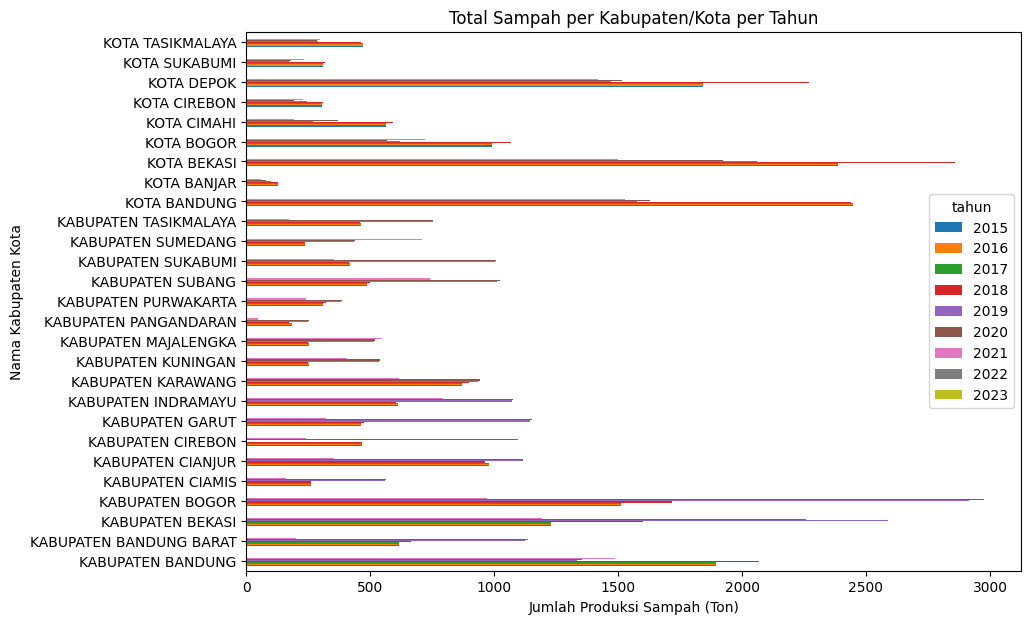

In [21]:
import matplotlib.pyplot as plt
df_grouped = data.groupby(['nama_kabupaten_kota', 'tahun'])['jumlah_produksi_sampah'].sum().reset_index()
df_pivot = df_grouped.pivot(index='nama_kabupaten_kota', columns='tahun', values='jumlah_produksi_sampah')
df_pivot.plot(kind='barh', stacked=False, figsize=(10, 7))
plt.xlabel('Jumlah Produksi Sampah (Ton)')
plt.ylabel('Nama Kabupaten Kota')
plt.title('Total Sampah per Kabupaten/Kota per Tahun')
plt.show()